## Length of the report {-}
The length of the report must be no more than 15 pages, when printed as PDF. However, there is no requirement on the minimum number of pages.

You may put additional stuff as Appendix. You may refer to the Appendix in the main report to support your arguments. However, your appendix is unlikely to be checked while grading, unless the grader deems it necessary. The appendix, references, and information about GitHub and individual contribution will not be included in the page count, and there is no limit on the length of the appendix.

**Delete this section from the report, when using this template.** 

## Code should be put separately in the code template {-}
Your report should be in a research-paper like style. If there is something that can only be explained by showing the code, then you may put it, otherwise do not put the code in the report. We will check your code in the code template. 

**Delete this section from the report, when using this template.** 

## Background / Motivation

What motivated you to work on this problem?

Mention any background about the problem, if it is required to understand your analysis later on.

**6.7 million people reside in Victoria (2020), Australia’s second most populated state. Our motivation for the project stemmed from our interest in predicting the need for vital resources that power people’s daily lives, like energy. The electricity demand dataset from Victoria, Australia on Kaggle required minimal data cleaning and included variables that served as interesting weather predictors to investigate. Predicting energy demand is crucial for a large state, especially as Victoria has many residents working from home since the onset of the pandemic, which requires reliable and ample electricity.**

## Problem statement 

Describe your problem statement. Articulate your objectives using absolutely no jargon. Interpret the problem as inference and/or prediction.

**In order for the state to provide enough energy to fuel each person’s daily lives and activities, they must accurately prepare for and supply energy resources based on changing weather conditions. Additionally, accurate energy consumption predictions will help officials with making sure that the necessary energy policies and infrastructure is in place. Unusual patterns or anomalies could indicate energy waste. The goal of this problem is to help Victoria accurately predict energy demand based on changing weather conditions and national holidays.**

**This is a linear regression problem focused on prediction. We analyze the relationship between the variables min_temperature, max_temperature, solar_exposure, rainfall, holiday and the energy demand (a continuous response variable).**

**To measure success, we optimize our model based on RMSE (prediction - actual) to minimize error and improve accuracy. RMSE is a useful metric as it more heavily weighs large errors, and overestimating or underestimating energy consumption (demand) can result in scarce or wasted resources.**


## Data sources
What data did you use? Provide details about your data. Include links to data if you are using open-access data.

**We are using the “Daily Electricity Price and Demand Data” dataset from Kaggle, which contains daily price, demand and weather data in Victoria, Australia. Its continuous variables (minimum temperature, maximum temperature, solar exposure, rainfall) and categorical variables (school day, holiday) will help us determine which factors influence the total daily electricity demand in MWh and to what extent.**

https://www.kaggle.com/datasets/aramacus/electricity-demand-in-victoria-australia 

## Stakeholders
Who cares? If you are successful, what difference will it make to them?

**The primary stakeholders are the Australian government and electricity companies/providers—both of which hold decision-making power. The government purchases and budgets electricity for Victoria residents; they must predict fluctuating demand levels to provide reliable, consistent energy. Electricity companies and providers generate and supply electricity, and should invest the appropriate amount of resources to meet demand without over-investing. Imagine that (1) we find rainfall increases energy consumption in Victoria and (2) the city will experience an abnormal amount of rainfall next year. By predicting how much energy will be consumed in that rainy year, the stakeholders (government and electric companies) could plan accordingly to ensure supply meets demand.**

**The secondary stakeholders are the residents of Victoria. These include working adults, families, business owners and more, all of whom would experience disruptions to daily life if electricity supply fails to meet demand. Important establishments like hospitals present a higher stakes scenario, since much life-saving medical equipment is powered by electricity. Disruptions range from minor inconveniences to major consequences. Predicting electricity demand for Victoria is what will keep the state of Victoria running smoothly and ensure happy citizens.**


## Data quality check / cleaning / preparation 

In a tabular form, show the distribution of values of each variable used in the analysis - for both categorical and continuous variables. Distribution of a categorical variable must include the number of missing values, the number of unique values, the frequency of all its levels. If a categorical variable has too many levels, you may just include the counts of the top 3-5 levels. 

If the tables in this section take too much space, you may put them in the appendix, and just mention any useful insights you obtained from the data quality check that helped you develop the model or helped you realize the necessary data cleaning / preparation.

Were there any potentially incorrect values of variables that required cleaning? If yes, how did you clean them? 

***There were 4 NA values in this dataset, 1 for solar_exposure and 3 for rainfall, so we imputed them with the means of their respective variables. For example, since the mean of df['solar_exposure'] is 14.74337292161519, we replaced the NA value of solar_exposure with 14.74337292161519.***

Did you do any data wrangling or data preparation before the data was ready to use for model development? Did you create any new predictors from exisiting predictors? For example, if you have number of transactions and spend in a credit card dataset, you may create spend per transaction for predicting if a customer pays their credit card bill. Mention the steps at a broad level, you may put minor details in the appendix. Only mention the steps that ended up being useful towards developing your final model(s).

***In addition to imputing NA values, we changed the values of'school_day' and 'holiday' ('N' and 'Y') to a binary of 0 and 1 so that they could be added to our regression model.***

In [9]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('complete_dataset.csv')
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df = df.drop(['RRP', 'demand_pos_RRP', 'RRP_positive', 'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP'], axis=1)

In [13]:
print('Mean of solar_exposure: ' + str(df['solar_exposure'].mean()))
df.at[1060, 'solar_exposure']=14.74337292161519

print('Mean of rainfall: ' + str(df['rainfall'].mean()))
df.at[161, 'rainfall']=1.505943889681408
df.at[1377, 'rainfall']=1.505943889681408
df.at[1378, 'rainfall']=1.505943889681408

Mean of solar_exposure: 14.74337292161519
Mean of rainfall: 1.505943889681408


In [10]:
df['school_day'] = df['school_day'].apply(lambda x: 1 if x == 'Y' else 0)
df['holiday'] = df['holiday'].apply(lambda x: 1 if x == 'Y' else 0)

In [11]:
df.describe()

,demand,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
count,2106.000000,2106.000000,2106.000000,2105.000000,2103.000000,2106.000000,2106.000000
mean,120035.476503,11.582289,20.413200,14.743373,1.505944,0.689934,0.036562
std,13747.993761,4.313711,6.288693,7.945527,4.307897,0.462630,0.187729
min,85094.375000,0.600000,9.000000,0.700000,0.000000,0.000000,0.000000
25%,109963.650000,8.500000,15.525000,8.200000,0.000000,0.000000,0.000000
50%,119585.912500,11.300000,19.100000,12.700000,0.000000,1.000000,0.000000
75%,130436.006250,14.600000,23.900000,20.700000,0.800000,1.000000,0.000000
max,170653.840000,28.000000,43.500000,33.300000,54.600000,1.000000,1.000000


In [12]:
df.isnull().sum()

date               0
demand             0
min_temperature    0
max_temperature    0
solar_exposure     1
rainfall           3
school_day         0
holiday            0
dtype: int64

## Exploratory data analysis

Put the relevant EDA here (visualizations, tables, etc.) that helped you figure out useful predictors for developing the model(s). Only put the EDA that ended up being useful towards developing your final model(s). 

List the insights (as bullet points) you got from EDA that ended up being useful towards developing your final model. 

Again, if there are too many plots / tables, you may put them into appendix, and just mention the insights you got from them.

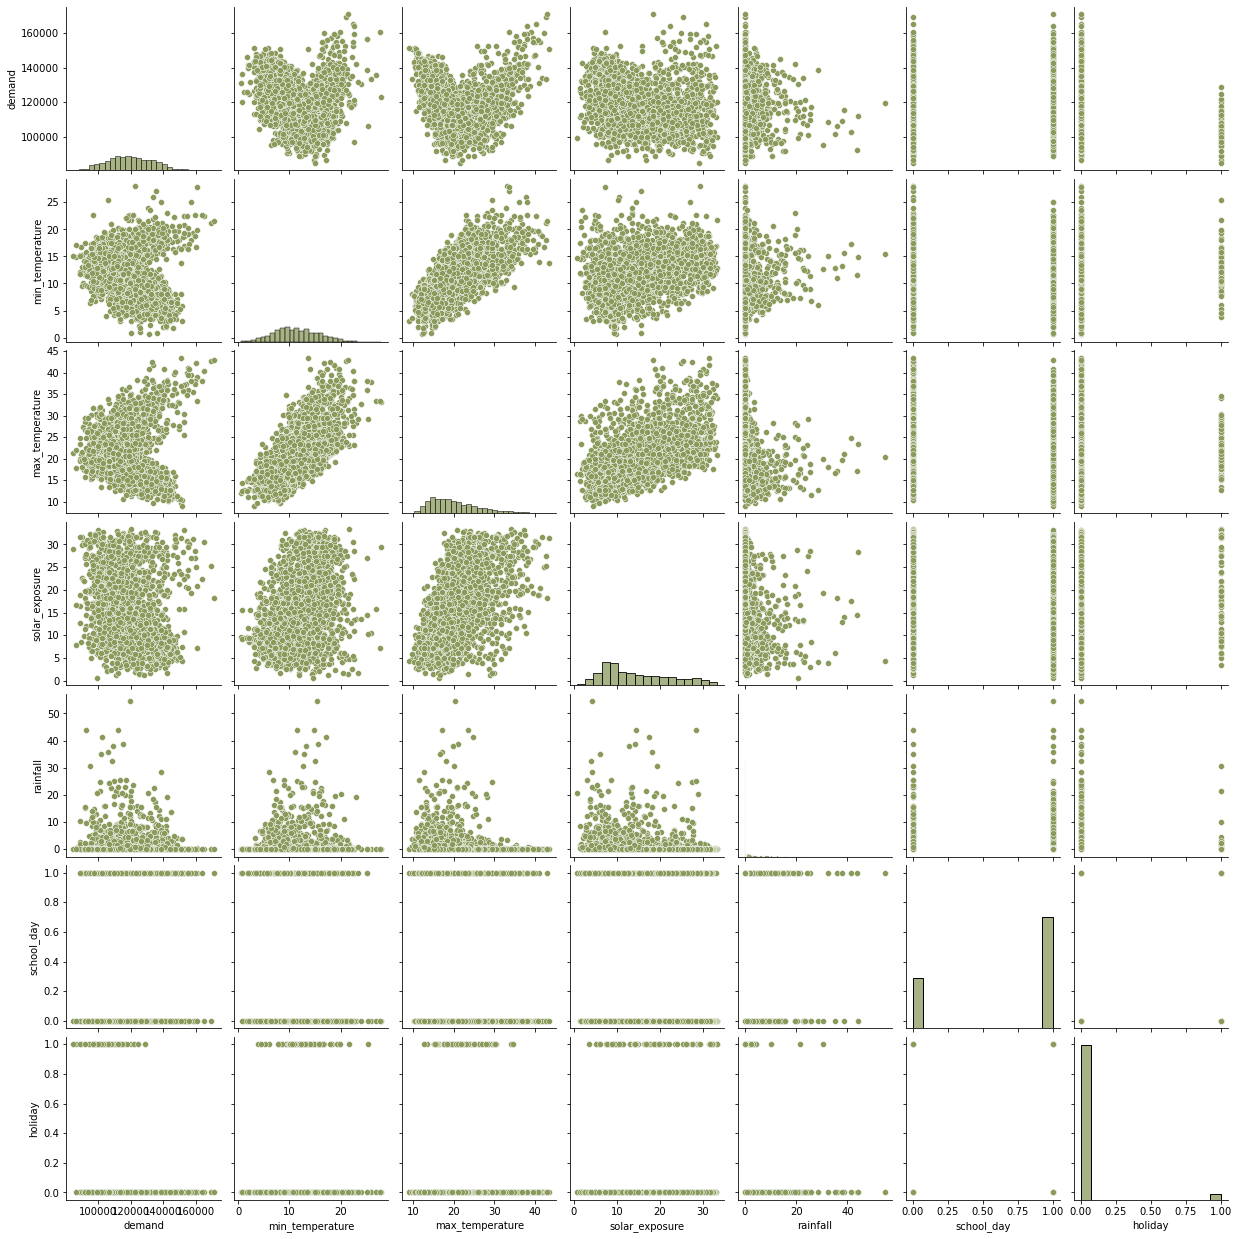

In [18]:
sns.pairplot(df, plot_kws={'color':'#8A9A5B'}, diag_kws={'color':'#8A9A5B'})

- ***There is an obvious quadratic relationship between demand and min_temperature and demand and max_temperature***
- ***It seems that solar_exposure might also have a quadratic relationship with demand, but a residual plot should be graphed to confirm***
- ***Whether rainfall, school_day, and/or holiday have an effect on demand is unclear. They should be included in the first model so that we can check their p-values.***

Text(0, 0.5, 'Demand')

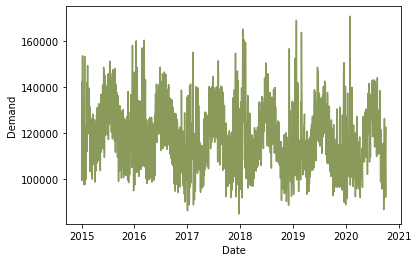

In [19]:
sns.lineplot(x='date', y='demand', data=df, color = '#8A9A5B')
plt.xlabel('Date')
plt.ylabel('Demand')

- ***The repeating patterns in the lineplot of demand against date indicate autocorrelation.***

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = df[['max_temperature', 'min_temperature', 'solar_exposure', 'holiday', 'rainfall']]
X = add_constant(X, has_constant='add')
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

for i in range(len(X.columns)):
    X.columns[i]
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

           feature        VIF
0            const  12.478907
1  max_temperature   2.768200
2  min_temperature   2.056258
3   solar_exposure   1.571803
4          holiday   1.005603
5         rainfall   1.050010


- ***All of the values of VIF are close to 1, so we do not need to be concerned about multicollinearity in our model.***

## Approach

What kind of a model (linear / logistic / other) did you use? What performance metric(s) did you optimize and why?

**To predict energy demand in Victoria from 2015-2020, we used a multilinear regression model and optimized for low RMSE and high R-squared as we aimed to minimize relative error while maximizing the model’s predictive power. A low RMSE and high R-squared gives stakeholders confidence in the results generated by this regression model.**

Is there anything unorthodox / new in your approach? 

What problems did you anticipate? What problems did you encounter? Did the very first model you tried work? 

**We anticipated issues with finding the most effective combination of lag variables while conducting autocorrelation and found that RMSE would not always decrease when the combination of lag variables was changed. To find the most optimal autocorrelation model, we used a for-loop to go through different combinations of variables with different amounts of lag and return the RMSE of each of these models. From then, the autocorrelation model with lowest RMSE was found.**

Did your problem already have solution(s) (posted on Kaggle or elsewhere). If yes, then how did you build upon those solutions, what did you do differently? Is your model better as compared to those solutions in terms of prediction / inference?

**Important: Mention any code repositories (with citations) or other sources that you used, and specifically what changes you made to them for your project.**

## Developing the model

**Explain the steps taken to develop and improve the base model - informative visualizations / addressing modeling assumption violations / variable transformation / interactions / outlier treatment / influential points treatment / addressing over-fitting / addressing multicollinearity / variable selection - stepwise regression, lasso, ridge regression). **

**For our first regression model, we chose to regress energy demand in Victoria from 2015-2020 against all of the non-price predictors of demand within the dataset: min_temperature, max_temperature, solar_exposure, rainfall, and two dummy variables for whether it is a school day or a holiday. With no interaction variables or transformations, even though the model itself and every predictor has a p-value of less than 0.05, indicating statistical significance, the R-squared is 0.166, meaning it has low predictive power.**

<div>
   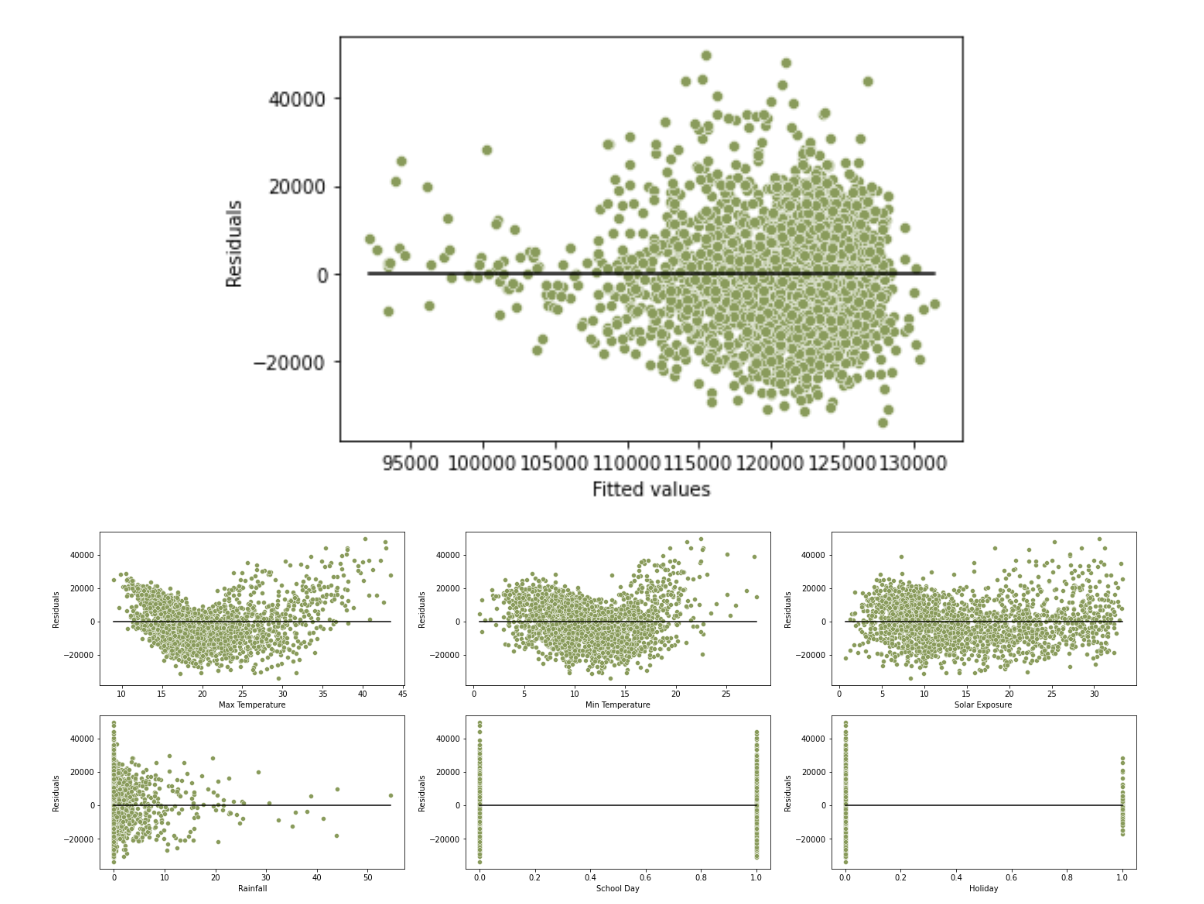
</div>

**To improve the model’s predictive power, we checked for linearity assumptions. The residual plot of the initial model shows heteroscedasticity so we chose to apply a log transformation on the response variable. Furthermore, as max_temp, min_temp, and solar_exposure all exhibit parabolicity, we applied quadratic transformations on these variables, leading us to our full second regression model, and with these transformations, the model itself and the predictor variables are still statistically significant and R-squared increased by 187% to 0.476. When the residuals are plotted once again, we can see that there is much improvement from the model with no transformations.**


**In addition to transformations, we explored the possibility of using interaction variables to further optimize the regression model and to investigate possible relationships between predictors. When an interaction variable for Holiday and Maximum Temperature, the two most influential variables in terms of coefficients, was applied to the model, there was minimal interaction and no real improvement. The R-squared remained constant and the RMSE increased by approximately 0.00000000015 — a negligible amount.**

**As demand demonstrates periodicity, we conducted autocorrelation, adding lag variables at increasing increments: 1 day, 1 week, and 2 weeks. While for each additional lag variable R-squared increased and RMSE decreased [(0.471, 9498.59), (0.624, 8187.29), (0.744, 7373.21), and (0.775, 6997.95)], respectfully, we found that two weeks was an optimum in terms of autocorrelation.**

**The final model has an R-squared value of 0.775 and an RMSE of 6997.95, much lower relative to other models of similar scope and target.**

Did you succeed in achieving your goal, or did you fail? Why?

**Yes, we succeeded in achieving our goal as we are able to predict electricity demand based on weather factors and holidays in order to anticipate the city’s needed supply by inputting known weather and holiday data, and given the R-squared of 0.775 and RMSE of 6997.95 (lower end of target RMSE range), these predictions can be utilized with confidence.**

Put the final model equation.

**np.log(demand) ~ max_temperature + I(max_temperature ** 2) + min_temperature + I(min_temperature ** 2) + solar_exposure + I(solar_exposure ** 2) + holiday + rainfall + demand_lag_1_day + demand_lag_1_week + demand_lag_2_week**

**Important: This section should be rigorous and thorough. Present detailed information about decision you made, why you made them, and any evidence/experimentation to back them up.**

## Limitations of the model with regard to inference / prediction

If it is inference, will the inference hold for a certain period of time, for a certain subset of population, and / or for certain conditions.

If it is prediction, then will it be possible / convenient / expensive for the stakeholders to collect the data relating to the predictors in the model. Using your model, how soon will the stakeholder be able to predict the outcome before the outcome occurs. For example, if the model predicts the number of bikes people will rent in Evanston on a certain day, then how many days before that day will your model be able to make the prediction. This will depend on how soon the data that your model uses becomes available. If you are predicting election results, how many days / weeks / months / years before the election can you predict the results. 

When will your model become too obsolete to be useful?

**The developed model is used for prediction. In terms of collecting data relating to the predictors in the model, this process is fairly convenient and certainly possible. Weather data is widely available and meteorologists often predict weather months in advance. Australia’s Bureau of Meteorology documents and broadcasts past weather, observations, and forecasts for the state to stay informed. Australia’s Department of Climate Change, Energy, the Environment and Water monitors electricity consumption and generation. Given that both are government agencies, data sharing is common practice and the constant collection of data provides a wealth of accessible information for each of the predictors in the model.**

**Specifically for weather data, technically any number of days or weeks in advance is feasible for stakeholders. However, for best predictions, stakeholders are recommended to use the model on a weekly cadence, predicting the electricity demand one week prior. Research shows that a 7 day forecast has the highest accuracy, while a 10-day (or longer) forecast is correct about half the time. Holiday data rarely changes and is very accessible at any time of the year—stakeholders can indicate whether the day is a holiday or not based on the official government holidays calendar.**


## Conclusions and Recommendations to stakeholder(s)

What conclusions do you draw based on your model? If it is inference you may draw conclusions based on the coefficients, statistical significance of predictors / interactions, etc. If it is prediction, you may draw conclusions based on prediction accuracy, or other performance metrics.

How do you use those conclusions to come up with meaningful recommendations for stakeholders? The recommendations must be action-items for stakeholders that they can directly implement without any further analysis. Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

If your recommendations are not practically implementable by stakeholders, how will they help them? Is there some additional data / analysis / domain expertise you need to do to make the recommendations implementable? 

Do the stakeholder(s) need to be aware about some limitations of your model? Is your model only good for one-time use, or is it possible to update your model at a certain frequency (based on recent data) to keep using it in the future? If it can be used in the future, then for how far into the future?

**The optimal model’s R-squared is 0.775 and the RMSE is 6997.95. Given the high accuracy and the RMSE that is on the lower end of the range compared to other models developed with the same data, stakeholders can be confident in the prediction results.**

**As a result, stakeholders should consider the following recommendations outlined here when estimating the electricity demand. The first recommendation advises stakeholders to reduce energy supply and generation during holidays, as that predictor’s coefficient (with all other predictors held constant) shows a decrease in energy demand by about 10%. Residents of Victoria are likely not working on national holidays and the majority of businesses are closed, which explains the lesser demand. The second insight relates to minimum and maximum temperature—their coefficients are relatively small, demonstrating that temperature doesn’t have a large impact on energy demand. The lesser effect of temperature predictors makes sense; during hot weather, the air conditioner will be on blast, while cold weather warrants heating systems to be on.**

**Lastly, there are several limitations of the model that should be considered. The model uses data from three years ago; it was not trained on weather data from the last year. Therefore, we advise that models be trained on new data each year to stay up to date. Especially with climate change causing more unpredictable weather patterns in recent years, updating the model will be crucial to continuously obtain accurate electricity demand predictions. With these recommendations in mind while running the model, the government can make the necessary decisions with electricity companies to match supply with demand.**


## GitHub and individual contribution {-}

Put the **Github link** for the project repository.

https://github.com/Dsl03/STAT303-2-Final-Project

Add details of each team member's contribution in the table below.

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 50%;">
       <col span="1" style="width: 15%;"> 
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Contributed aspects</th>
    <th>Details</th>
    <th>Number of GitHub commits</th>
  </tr>
  <tr>
    <td>Elton John</td>
    <td>Data cleaning and EDA</td>
    <td>Cleaned data to impute missing values and developed visualizations to identify appropriate variable transformations.</td>
    <td>100</td>
  </tr>
  <tr>
    <td>Xena Valenzuela</td>
    <td>Assumptions and interactions</td>
    <td>Checked and addressed modeling assumptions and identified relevant variable interactions.</td>
    <td>120</td>
  </tr>
    <tr>
    <td>Sankaranarayanan Balasubramanian</td>
    <td>Outlier and influential points treatment</td>
    <td>Identified outliers/influential points and analayzed their effect on the model.</td>
    <td>130</td>    
  </tr>
    <tr>
    <td>Chun-Li</td>
    <td>Variable selection and addressing overfitting</td>
    <td>Performed variable selection on an exhaustive set of predictors to address multicollinearity and overfitting.</td>
    <td>150</td>    
  </tr>
</table>

List the **challenges** you faced when collaborating with the team on GitHub. Are you comfortable using GitHub? 
Do you feel GitHuB made collaboration easier? If not, then why? *(Individual team members can put their opinion separately, if different from the rest of the team)*

## References {-}

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].

[1] Authors. The frobnicatable foo filter, 2014. Face and Gesture submission ID 324. Supplied as additional material
fg324.pdf. 3


## Appendix {-}

You may put additional stuff here as Appendix. You may refer to the Appendix in the main report to support your arguments. However, the appendix section is unlikely to be checked while grading, unless the grader deems it necessary.